In [1]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
df_ultimate_test = pd.read_table("artificial_test.data", sep=" ", header=None)
df_ultimate_test = df_ultimate_test.drop(df_ultimate_test.columns[500], axis=1) # kolumna 500 do wyrzucenia
df_ultimate_test

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,483,454,513,495,523,469,453,477,506,479,...,455,480,543,259,413,520,485,498,523,510
1,485,508,493,487,478,472,504,476,479,475,...,486,480,535,534,514,452,484,495,548,477
2,483,521,507,475,493,486,421,475,496,483,...,491,476,498,495,508,528,486,465,508,503
3,474,504,576,480,553,483,524,478,483,483,...,521,475,470,463,509,525,479,467,552,517
4,495,474,523,479,495,488,485,476,497,478,...,510,471,522,343,509,520,475,493,506,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,493,458,503,478,517,479,472,478,444,477,...,469,475,485,443,517,486,474,489,506,506
596,481,484,481,490,449,481,467,478,469,483,...,506,485,508,599,498,527,481,490,455,451
597,485,485,530,480,444,487,462,475,509,494,...,442,474,502,368,453,482,478,481,484,517
598,477,469,528,485,483,469,482,477,494,476,...,473,476,453,638,471,538,470,490,613,492


In [3]:
df_data_X = pd.read_table("artificial_train.data", sep=" ", header=None)
df_data_X = df_data_X.drop(df_data_X.columns[500], axis=1)
df_data_X

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,490,505,503,474,463,461,519,476,518,467,...,467,479,449,588,499,506,475,463,507,501
1996,480,475,476,480,495,482,515,479,480,484,...,464,474,473,424,454,570,476,493,465,485
1997,480,517,631,470,485,474,535,476,493,466,...,501,483,479,687,488,488,483,500,523,481
1998,484,481,505,478,542,477,518,477,510,472,...,487,483,526,750,486,529,484,473,527,485


In [4]:
df_data_Y = pd.read_table("artificial_train.labels", sep=" ", header=None)
df_data_Y.columns = ["label"]
df_data_Y

,label
0,-1
1,-1
2,-1
3,1
4,1
...,...
1995,1
1996,-1
1997,-1
1998,1


In [5]:
import xgboost as xgb
dtrain = xgb.DMatrix(df_data_X, label=df_data_Y)
watchlist = [(dtrain, 'train')]
param = {'max_depth': 6, 'learning_rate': 0.03}
num_round = 200
bst = xgb.train(param, dtrain, num_round, watchlist)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-rmse:0.97964
[1]	train-rmse:0.95989
[2]	train-rmse:0.94081
[3]	train-rmse:0.92268
[4]	train-rmse:0.90505
[5]	train-rmse:0.88884
[6]	train-rmse:0.87210
[7]	train-rmse:0.85592
[8]	train-rmse:0.84121
[9]	train-rmse:0.82675
[10]	train-rmse:0.81210
[11]	train-rmse:0.79886
[12]	train-rmse:0.78549
[13]	train-rmse:0.77349
[14]	train-rmse:0.76110
[15]	train-rmse:0.74849
[16]	train-rmse:0.73654
[17]	train-rmse:0.72463
[18]	train-rmse:0.71355
[19]	train-rmse:0.70301
[20]	train-rmse:0.69340
[21]	train-rmse:0.68331
[22]	train-rmse:0.67384
[23]	train-rmse:0.66402
[24]	train-rmse:0.65470
[25]	train-rmse:0.64468
[26]	train-rmse:0.63704
[27]	train-rmse:0.62971
[28]	train-rmse:0.62161
[29]	train-rmse:0.61536
[30]	train-rmse:0.60715
[31]	train-rmse:0.60018
[32]	train-rmse:0.59252
[33]	train-rmse:0.58578
[34]	train-rmse:0.57945
[35]	train-rmse:0.57311
[36]	train-rmse:0.56595
[37]	train-rmse:0.55924
[38]	train-rmse:0.55418
[39]	train-rmse:0.54875
[40]	train-rmse:0.54273
[41]	train-rmse:0.53689
[4

<Axes: >

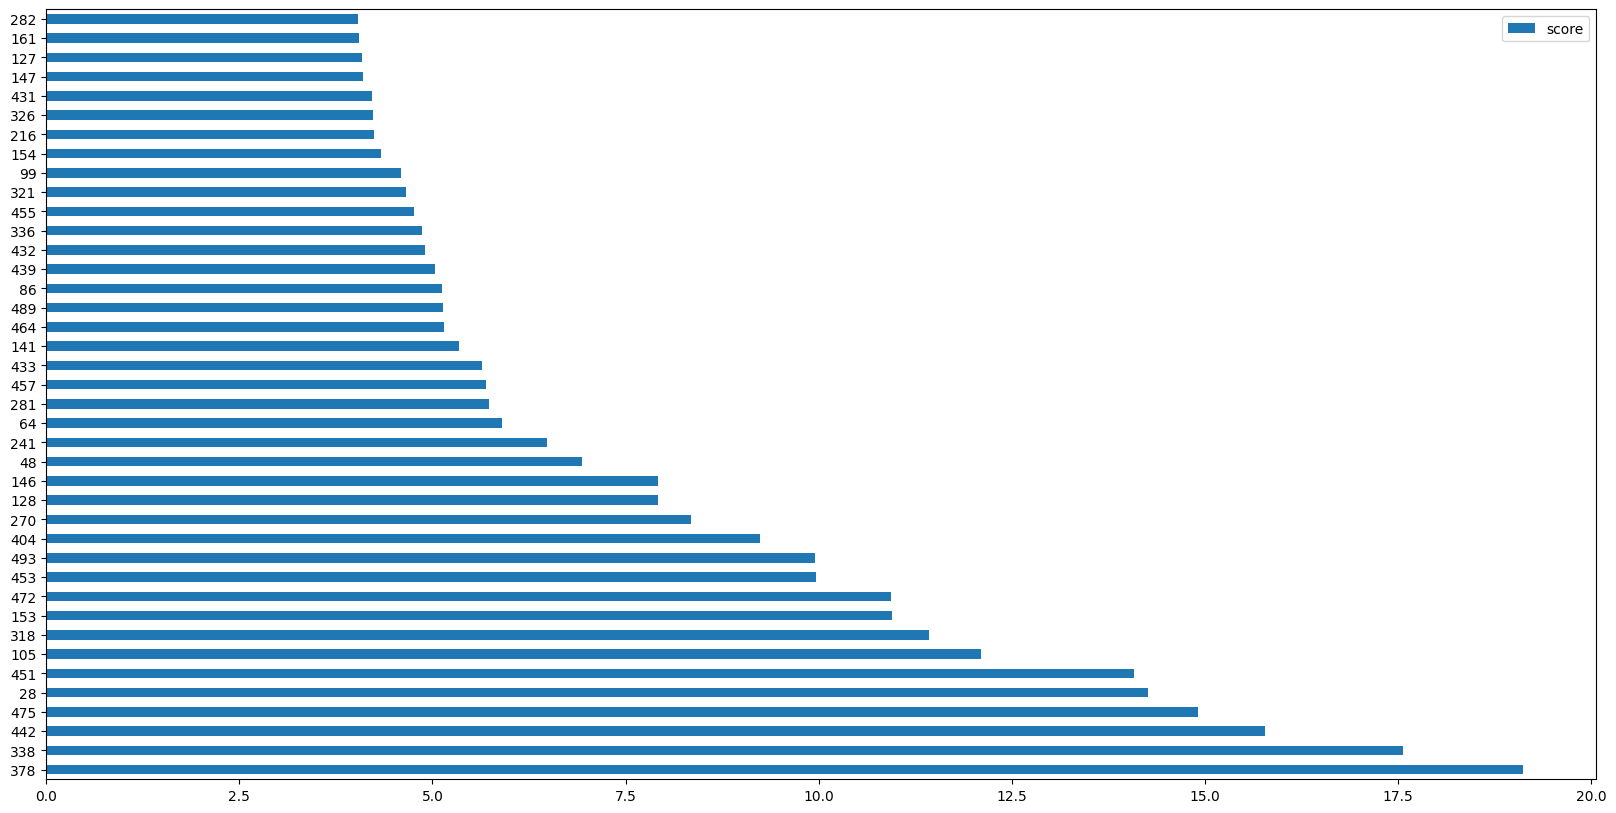

In [6]:
import matplotlib
feature_importance = bst.get_score(importance_type='gain')
keys = list(feature_importance.keys())
values = list(feature_importance.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [7]:
top_feature_indices = data.nlargest(100, columns="score").index.astype(int).tolist()

df_data_X_top100 = df_data_X.iloc[:, top_feature_indices]

df_data_X_top100

,378,338,442,475,28,451,105,318,153,472,...,236,175,358,494,231,172,462,273,484,204
0,419,628,568,401,459,463,181,414,575,515,...,473,457,479,511,508,561,496,469,515,484
1,526,528,463,549,475,474,431,469,404,465,...,493,519,462,513,442,489,485,407,598,495
2,464,431,503,454,491,481,593,506,585,485,...,469,529,488,506,485,518,513,477,482,472
3,553,377,447,602,472,472,698,458,591,457,...,487,566,520,454,495,495,472,505,525,464
4,424,509,536,560,472,472,451,462,448,500,...,479,449,509,486,489,470,528,529,468,508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,528,419,509,538,462,467,541,421,638,483,...,481,446,569,499,470,488,484,354,445,528
1996,430,348,421,601,496,488,696,544,468,444,...,487,526,448,454,507,516,486,481,490,507
1997,582,406,428,437,500,489,752,544,622,449,...,485,413,485,488,467,514,500,445,492,523
1998,507,473,563,387,471,472,524,460,641,511,...,474,492,439,486,491,549,518,514,514,510


In [8]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(df_data_X_top100, df_data_Y, test_size=0.20, random_state=4, stratify=df_data_Y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_data_X, df_data_Y, test_size=0.20, random_state=4, stratify=df_data_Y)

In [9]:
from tabpfn import TabPFNClassifier

In [10]:
classifier0 = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
classifier1 = TabPFNClassifier(device='cpu', N_ensemble_configurations=64, subsample_features=True)

We have to download the TabPFN, as there is no checkpoint at  D:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\TabPFN\tabpfn\models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.


In [11]:
classifier0.fit(X_train0, y_train0, overwrite_warning=True)
y_eval0 = classifier0.predict(X_test0)
y_train_pred0 = classifier0.predict(X_train0)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default val

In [12]:
classifier1.fit(X_train1, y_train1, overwrite_warning=True)
y_eval1 = classifier1.predict(X_test1)
y_train_pred1 = classifier1.predict(X_train1)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
d:\Politechnika_Warszawska\SEM

In [13]:
print(f"best training score {balanced_accuracy_score(y_train0, y_train_pred0)} ,score test {balanced_accuracy_score(y_test0, y_eval0)}")

best training score 0.996875 ,score test 0.6950000000000001


In [14]:
print(f"best training score {balanced_accuracy_score(y_train1, y_train_pred1)} ,score test {balanced_accuracy_score(y_test1, y_eval1)}")

best training score 0.968125 ,score test 0.5975


In [16]:
df_data_X_ultimate_test_top100 = df_ultimate_test.iloc[:, top_feature_indices]

df_data_X_ultimate_test_top100

,378,338,442,475,28,451,105,318,153,472,...,236,175,358,494,231,172,462,273,484,204
0,423,523,444,538,490,486,420,513,409,454,...,468,462,502,413,485,486,511,542,432,502
1,580,484,414,429,491,484,541,522,567,439,...,469,530,503,514,464,492,465,508,472,469
2,432,485,526,517,479,477,500,482,485,494,...,482,429,525,508,482,468,491,467,507,505
3,443,700,649,386,472,472,314,458,405,540,...,477,466,518,509,466,442,496,405,562,535
4,517,609,518,527,469,470,395,451,417,487,...,463,421,549,509,493,519,551,433,480,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,459,436,385,531,487,482,474,510,592,433,...,467,452,522,517,490,514,489,437,508,480
596,396,477,588,502,465,468,456,433,564,531,...,489,485,464,498,492,496,478,507,536,502
597,523,453,362,514,504,494,550,564,480,417,...,476,476,546,453,503,516,453,481,511,464
598,537,420,544,521,468,469,635,441,567,501,...,479,435,437,471,484,443,495,483,490,460


In [18]:

y_predict_proba = classifier0.predict_proba(df_data_X_ultimate_test_top100)
for elem in y_predict_proba[:,1]:
    print(elem)

d:\Politechnika_Warszawska\SEM7\AutoML\HW2\pd2\venv\lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


0.45547438
0.37102422
0.37289786
0.71416336
0.3434227
0.5787165
0.4532141
0.28444862
0.5496243
0.78541446
0.7511748
0.8114914
0.25182116
0.5690502
0.38422957
0.65789723
0.37491918
0.9061073
0.65032697
0.39285487
0.58139753
0.47190365
0.34195998
0.47313276
0.550121
0.74477106
0.43728137
0.39748314
0.49236095
0.140992
0.3808599
0.26549998
0.64441246
0.55332077
0.531301
0.18395685
0.42973408
0.9207945
0.68129104
0.5382554
0.37334755
0.75111383
0.43490958
0.61346
0.5264583
0.7141171
0.21831943
0.61391616
0.44014472
0.57490057
0.876992
0.51193154
0.373843
0.6688044
0.7433968
0.43987167
0.44234926
0.11195582
0.38701364
0.23329005
0.7158486
0.43890992
0.34019795
0.46773154
0.8440735
0.5364699
0.10581895
0.35662892
0.4528225
0.7117847
0.81366974
0.6496376
0.8386618
0.85203755
0.8135689
0.45059898
0.4276091
0.32623088
0.7006446
0.34433493
0.33410677
0.64097893
0.4124458
0.80993634
0.7407921
0.41618386
0.3281129
0.32013273
0.53005266
0.24077661
0.5182045
0.3908015
0.38787326
0.5248922
0.8593541


In [19]:
for elem in y_predict_proba[:,1]:
    print(elem)

0.45547438
0.37102422
0.37289786
0.71416336
0.3434227
0.5787165
0.4532141
0.28444862
0.5496243
0.78541446
0.7511748
0.8114914
0.25182116
0.5690502
0.38422957
0.65789723
0.37491918
0.9061073
0.65032697
0.39285487
0.58139753
0.47190365
0.34195998
0.47313276
0.550121
0.74477106
0.43728137
0.39748314
0.49236095
0.140992
0.3808599
0.26549998
0.64441246
0.55332077
0.531301
0.18395685
0.42973408
0.9207945
0.68129104
0.5382554
0.37334755
0.75111383
0.43490958
0.61346
0.5264583
0.7141171
0.21831943
0.61391616
0.44014472
0.57490057
0.876992
0.51193154
0.373843
0.6688044
0.7433968
0.43987167
0.44234926
0.11195582
0.38701364
0.23329005
0.7158486
0.43890992
0.34019795
0.46773154
0.8440735
0.5364699
0.10581895
0.35662892
0.4528225
0.7117847
0.81366974
0.6496376
0.8386618
0.85203755
0.8135689
0.45059898
0.4276091
0.32623088
0.7006446
0.34433493
0.33410677
0.64097893
0.4124458
0.80993634
0.7407921
0.41618386
0.3281129
0.32013273
0.53005266
0.24077661
0.5182045
0.3908015
0.38787326
0.5248922
0.8593541
